In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import datetime
import re

In [4]:
df = pd.read_excel('richpeople.xlsx')
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN


In [5]:
recent_df = df[df['year'] == 2014]


In [7]:
recent_df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
5,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
6,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
8,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
9,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


In [9]:
recent_df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

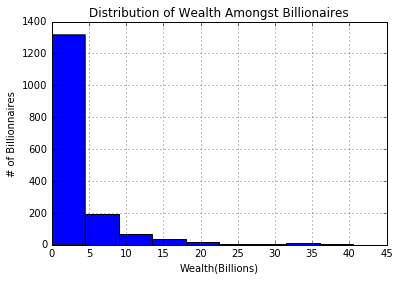

In [10]:
his = recent_df['networthusbillion'].hist(range=[0, 45])


his.set_title('Distribution of Wealth Amongst Billionaires')
his.set_xlabel('Wealth(Billions)')
his.set_ylabel('# of Billionnaires')

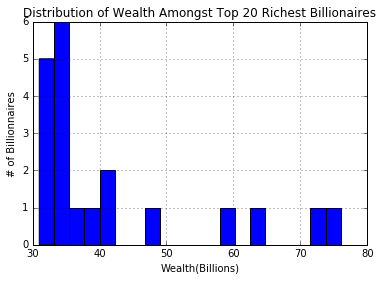

In [26]:
his = recent_df['networthusbillion'].sort_values(ascending=False).head(20).hist(bins=20)


his.set_title('Distribution of Wealth Amongst Top 20 Richest Billionaires')
his.set_xlabel('Wealth(Billions)')
his.set_ylabel('# of Billionnaires')

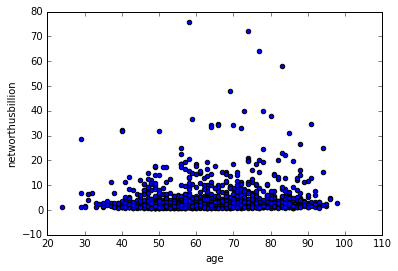

In [39]:
fig, ax = plt.subplots()
# need to remove negative ages from this data! -- resolved itself by using newer data sert 
recent_df.plot(kind='scatter', x='age', y='networthusbillion', ax=ax)


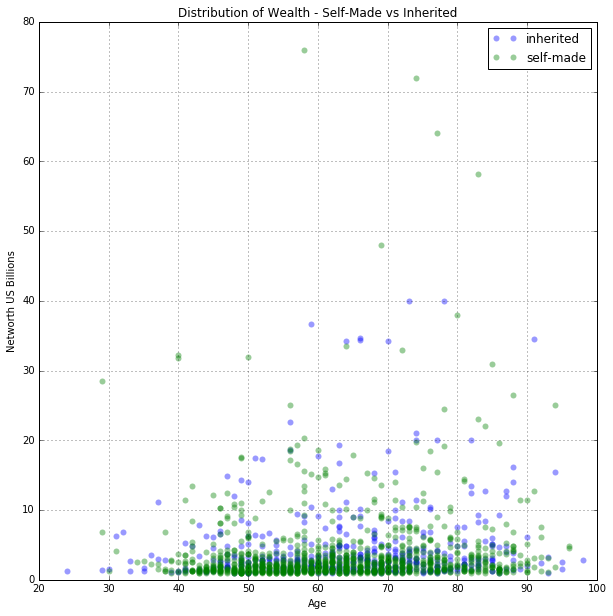

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Distribution of Wealth - Self-Made vs Inherited")
for category, group in recent_df.groupby('selfmade'):
    ax.plot(group['age'], group['networthusbillion'], marker='o', linestyle='', label=category, markeredgewidth=0, alpha=0.4)
ax.legend()
plt.grid(True)
ax.set_ylabel("Networth US Billions")
ax.set_xlabel("Age")
plt.savefig('SELFdistributionOfIntheritance.pdf')
plt.savefig('SELFdistributionOfIntheritance.png')

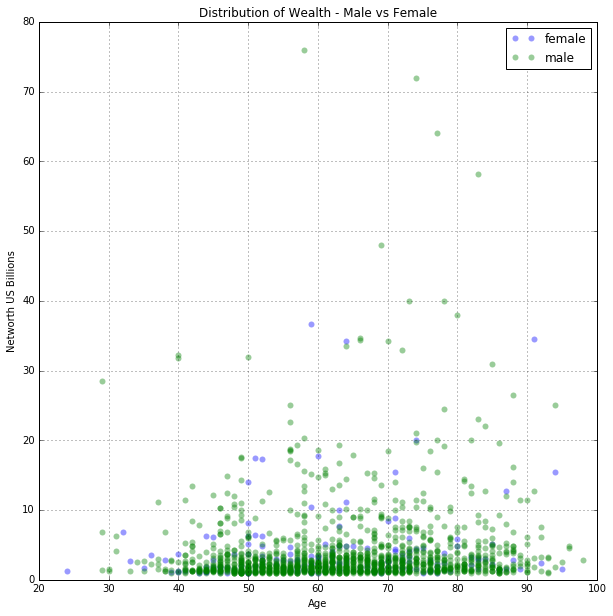

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Distribution of Wealth - Male vs Female")
for category, group in recent_df.groupby('gender'):
    ax.plot( group['age'], group['networthusbillion'], marker='o', linestyle='', label=category, markeredgewidth=0, alpha=0.4)
ax.legend()
plt.grid(True)
ax.set_ylabel("Networth US Billions")
ax.set_xlabel("Age")
plt.savefig('GENDERdistributionOfIntheritance.pdf')
plt.savefig('GENDERdistributionOfIntheritance.png')